In [166]:
from ucimlrepo import fetch_ucirepo 
import stat
# fetch dataset 
credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = credit_data.data.features 
y = credit_data.data.targets 
  
credit_data.metadata, credit_data.variables


({'uci_id': 144,
  'name': 'Statlog (German Credit Data)',
  'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data',
  'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv',
  'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix',
  'area': 'Social Science',
  'tasks': ['Classification'],
  'characteristics': ['Multivariate'],
  'num_instances': 1000,
  'num_features': 20,
  'feature_types': ['Categorical', 'Integer'],
  'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'],
  'target_col': ['class'],
  'index_col': None,
  'has_missing_values': 'no',
  'missing_values_symbol': None,
  'year_of_dataset_creation': 1994,
  'last_updated': 'Thu Aug 10 2023',
  'dataset_doi': '10.24432/C5NC77',
  'creators': ['Hans Hofmann'],
  'intro_paper': None,
  'additional_info': {'summary': 'Two datasets are provided.  th

In [167]:
X.tail()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,4,A123,27,A143,A152,1,A173,1,A191,A201


In [168]:
X.describe()

,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [169]:
y

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


In [170]:
#uncover any imblance in dataset
y['class'][y['class'] == 1].count(), y['class'][y['class'] == 2].count()

(np.int64(700), np.int64(300))

In [171]:
X['class'] = y

In [172]:
features_renamed = ['Stat_checking_acc', 'Duration_months', 'Credit_history', 'Purpose', 'Credit_amount', 'Savings_bonds', 'Duration_of_employment',
                    'Installment_pct_annual_income', 'Marital_status__and_sex', 'Other_debtors', 'Resident_since', 'Property', 'Age', 'Other_plans', 
                    'Housing', 'Num_existing_credits', 'Job', 'num_liable', 'Has_phone', 'Foreign_Worker', 'Class']

In [173]:
X = X.set_axis(labels=features_renamed, axis='columns') #renaming features for more readability

In [174]:
X

,Stat_checking_acc,Duration_months,Credit_history,Purpose,Credit_amount,Savings_bonds,Duration_of_employment,Installment_pct_annual_income,Marital_status__and_sex,Other_debtors,...,Property,Age,Other_plans,Housing,Num_existing_credits,Job,num_liable,Has_phone,Foreign_Worker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# Purpose

Observing the type of loans, and which are most common, and which have the most impact on credit.

Cheat sheet for Attribute 4 Values:

Attribute 4:  (qualitative)

	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others


In [175]:
X['Purpose'] = X['Purpose'].replace({'A40': 'car_new', 'A41': 'car_used', 'A42': 'furniture_equipment', 'A43': 'radio_tv', 'A44': 'domestic_appliances', 'A45': 'repairs', 'A46': 'education',
                                    'A48': 'retraining', 'A49': 'business', 'A410': 'others'})
X['Credit_history'] = X['Credit_history'].replace({'A30': 'paid_back_duly', 'A31': 'paid_back_duly', 'A32': 'paid_back_duly', 'A33': 'delayed_pay', 'A34': 'critical'})
X['Marital_status__and_sex'] = X['Marital_status__and_sex'].replace({'A91': 'male', 'A92': 'fem', 'A93': 'male', 'A94': 'male', 'A95': 'fem'})
X['Other_debtors'] = X['Other_debtors'].replace({'A101': 'none', 'A102': 'co-app', 'A103': 'guarantor'})
X['Property'] = X['Property'].replace({'A121': 'real_estate', 'A122': 'life_insurance', 'A123': 'car_or_other', 'A124': 'unknown_or_none'})
X['Other_plans'] = X['Other_plans'].replace({'A141': 'bank', 'A142': 'stores', 'A143': 'none'})
X['Housing'] = X['Housing'].replace({'A151': 'own/free', 'A152': 'rent', 'A153': 'own/free'})
X['Job'] = X['Job'].replace({'A171': 'unskilled', 'A172': 'unskilled', 'A173': 'skilled', 'A174': 'skilled'})
X['Has_phone'] = X['Has_phone'].replace({'A191': 0, 'A192': 1})
X['Foreign_Worker'] = X['Foreign_Worker'].replace({'A201': 1, 'A202': 0})

C:\Users\badra\AppData\Local\Temp\ipykernel_19000\977842695.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Has_phone'] = X['Has_phone'].replace({'A191': 0, 'A192': 1})
C:\Users\badra\AppData\Local\Temp\ipykernel_19000\977842695.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Foreign_Worker'] = X['Foreign_Worker'].replace({'A201': 1, 'A202': 0})


In [176]:
X['Savings_bonds'] = X['Savings_bonds'].replace({'A61': '<100dm', 'A62': '<500dm', 'A63': '<1000dm', 'A64': '>=1000dm', 'A65': 0})
X['Duration_of_employment'] = X['Duration_of_employment'].replace({'A71': 'unemployed', 'A72': '<1yr', 'A73': '<4yr', 'A74': '<7yr', 'A75': '=>7yr'})
X['Stat_checking_acc'] = X['Stat_checking_acc'].replace({'A11': '<0dm', 'A12': '<200dm', 'A13': '>=200dm', 'A14': 0})

In [177]:
import numpy as np

# Define value ranges and normal distribution parameters for each column
savings_bonds_dist = {
    '<100dm':     {'mean': 50,   'std': 15,  'min': 0,    'max': 100},
    '<500dm':     {'mean': 250,  'std': 75,  'min': 100,  'max': 500},
    '<1000dm':    {'mean': 750,  'std': 100, 'min': 500,  'max': 1000},
    '>=1000dm':   {'mean': 5000, 'std': 1000, 'min': 1000, 'max': 10000},
    0:            {'mean': 0,    'std': 0,   'min': 0,    'max': 0}
}

employment_dist = {
    'unemployed': {'mean': 0,    'std': 0,  'min': 0, 'max': 0},
    '<1yr':       {'mean': 0,  'std': 0,  'min': 0, 'max': 0},
    '<4yr':       {'mean': 2,    'std': 1,    'min': 1, 'max': 4},
    '<7yr':       {'mean': 6,    'std': 1,    'min': 4, 'max': 7},
    '=>7yr':      {'mean': 12,   'std': 2,    'min': 7, 'max': 20}
}

checking_acc_dist = {
    '<0dm':     {'mean': -100,  'std': 15,  'min': -200, 'max': 0},
    '<200dm':   {'mean': 100,   'std': 30,  'min': 0,     'max': 200},
    '>=200dm':  {'mean': 500,   'std': 100, 'min': 200,   'max': 1000},
    0:          {'mean': 0,     'std': 1,   'min': 0,     'max': 1}
}

# Helper function to generate bounded normal values
def bounded_normal(category, dist_map):
    dist = dist_map.get(category)
    if not dist:
        return np.nan
    while True:
        val = np.random.normal(loc=dist['mean'], scale=dist['std'])
        if dist['min'] <= val <= dist['max']:
            return round(val, 2)
        elif val < dist['min']:
            return dist['min']
        elif val > dist['max']:
            return dist['max']


In [178]:
X['Savings_bonds'] = X['Savings_bonds'].apply(lambda x: bounded_normal(x, savings_bonds_dist)//1)
X['Duration_of_employment'] = X['Duration_of_employment'].apply(lambda x: bounded_normal(x, employment_dist)//1)
X['Stat_checking_acc'] = X['Stat_checking_acc'].apply(lambda x: bounded_normal(x, checking_acc_dist)//1)

In [179]:
#applied bounded normal distribution to the numerical features based on their categories
X

,Stat_checking_acc,Duration_months,Credit_history,Purpose,Credit_amount,Savings_bonds,Duration_of_employment,Installment_pct_annual_income,Marital_status__and_sex,Other_debtors,...,Property,Age,Other_plans,Housing,Num_existing_credits,Job,num_liable,Has_phone,Foreign_Worker,Class
0,-82.0,6,critical,radio_tv,1169,0.0,11.0,4,male,none,...,real_estate,67,none,rent,2,skilled,1,1,1,1
1,84.0,48,paid_back_duly,radio_tv,5951,55.0,1.0,2,fem,none,...,real_estate,22,none,rent,1,skilled,1,0,1,2
2,0.0,12,critical,education,2096,37.0,5.0,2,male,none,...,real_estate,49,none,rent,1,unskilled,2,0,1,1
3,-92.0,42,paid_back_duly,furniture_equipment,7882,73.0,5.0,2,male,guarantor,...,life_insurance,45,none,own/free,1,skilled,2,0,1,1
4,-93.0,24,delayed_pay,car_new,4870,19.0,2.0,3,male,none,...,unknown_or_none,53,none,own/free,2,skilled,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,12,paid_back_duly,furniture_equipment,1736,84.0,4.0,3,fem,none,...,real_estate,31,none,rent,1,unskilled,1,0,1,1
996,-106.0,30,paid_back_duly,car_used,3857,39.0,3.0,4,male,none,...,life_insurance,40,none,rent,1,skilled,1,1,1,1
997,1.0,12,paid_back_duly,radio_tv,804,62.0,15.0,4,male,none,...,car_or_other,38,none,rent,1,skilled,1,0,1,1
998,-111.0,45,paid_back_duly,radio_tv,1845,61.0,2.0,4,male,none,...,unknown_or_none,23,none,own/free,1,skilled,1,1,1,2


Text(0.5, 1.0, 'Loan Purpose vs Credit Risk')

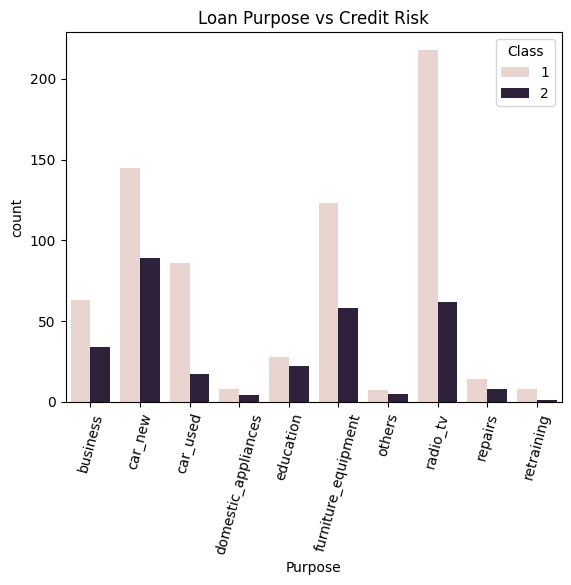

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of loan purpose vs target
sns.countplot(data=X, x='Purpose', hue='Class', order=sorted(X['Purpose'].unique()))
plt.xticks(rotation=75)
plt.title("Loan Purpose vs Credit Risk")



In [181]:
count_car_new_old = X['Purpose'][X['Purpose'].isin(['car_new', 'car_used'])].count()
count_car_new_old_bad = X['Purpose'][X['Purpose'].isin(['car_new', 'car_used'])][X['Class']==2].count()
count_car_new_old, count_car_new_old_bad, (count_car_new_old_bad/count_car_new_old)*100

(np.int64(337), np.int64(106), np.float64(31.454005934718097))

In [182]:
count_car_new = X['Purpose'][X['Purpose'].isin(['car_new'])].count()
count_car_new_bad = X['Purpose'][X['Purpose'].isin(['car_new'])][X['Class']==2].count()
count_car_new, count_car_new_bad, (count_car_new_bad/count_car_new)*100

(np.int64(234), np.int64(89), np.float64(38.034188034188034))

Text(0.5, 1.0, 'Credit amount vs Class')

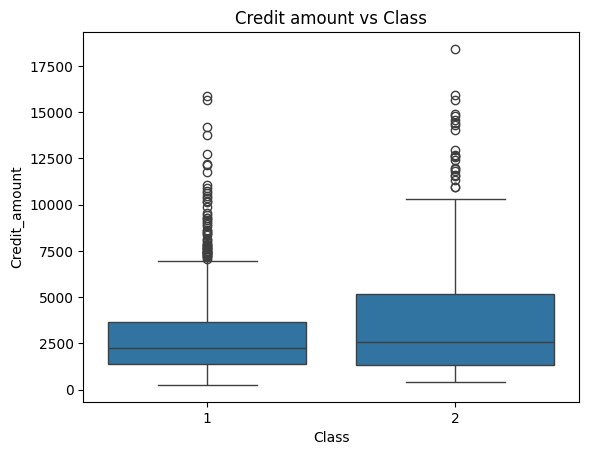

In [183]:
sns.boxplot(x=X['Class'], y=X['Credit_amount'])
plt.title("Credit amount vs Class")

Text(0.5, 1.0, 'Credit amount (car debtors) vs class')

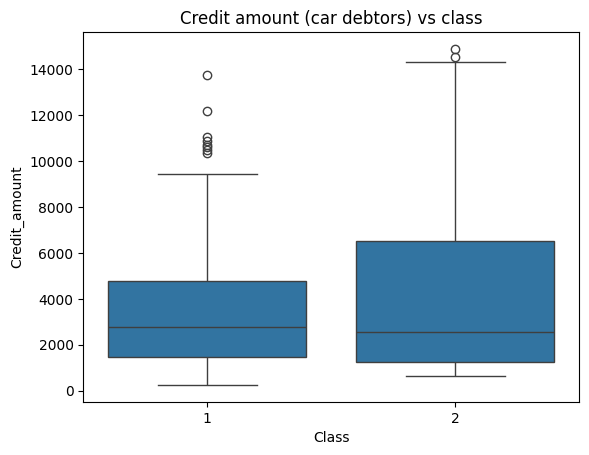

In [184]:
sns.boxplot(x=X['Class'], y=X['Credit_amount'][X['Purpose'].isin(['car_new', 'car_used'])])
plt.title("Credit amount (car debtors) vs class")


In [185]:
mean_bad = X['Credit_amount'][X['Purpose'].isin(['car_new', 'car_used'])][X['Class']==2].mean()
std_bad = X['Credit_amount'][X['Purpose'].isin(['car_new', 'car_used'])][X['Class']==2].std()

mean_good = X['Credit_amount'][X['Purpose'].isin(['car_new', 'car_used'])][X['Class']==1].mean()
std_good = X['Credit_amount'][X['Purpose'].isin(['car_new', 'car_used'])][X['Class']==1].std()

f'{mean_bad}, {mean_good} {std_bad}, {std_good}'

'4221.952830188679, 3559.974025974026 3915.891360869805, 2667.328352200541'

Text(0.5, 1.0, 'loan durations vs class')

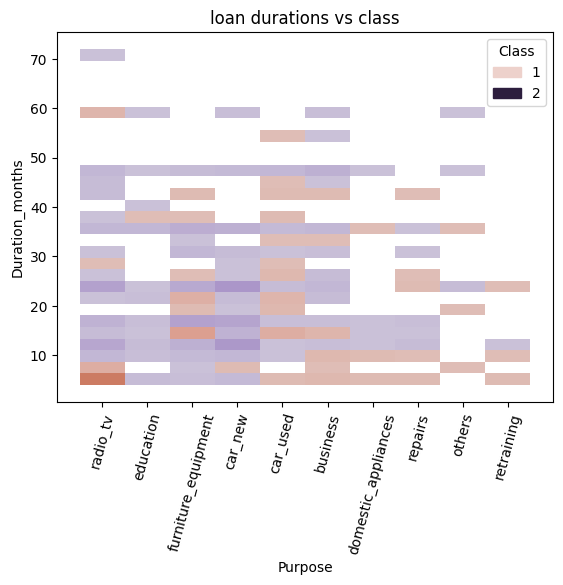

In [186]:
sns.histplot(data=X, x='Purpose', y='Duration_months', hue='Class')
plt.xticks(rotation=75)
plt.title("loan durations vs class")

Text(0.5, 1.0, 'Credit amount (car debtors) vs class')

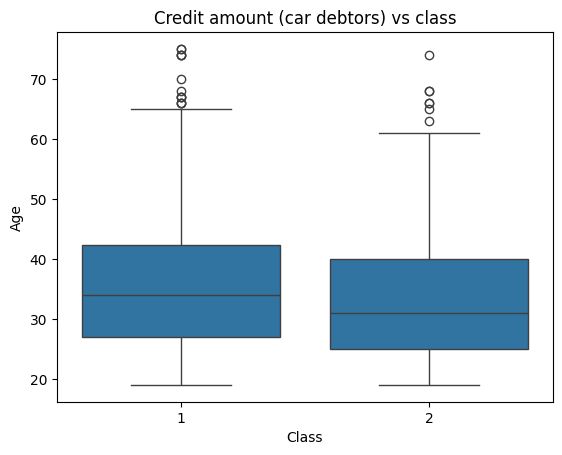

In [187]:
sns.boxplot(x=X['Class'], y=X['Age'])
plt.title("Credit amount (car debtors) vs class")


Text(0.5, 1.0, 'debtor housing vs Credit Risk')

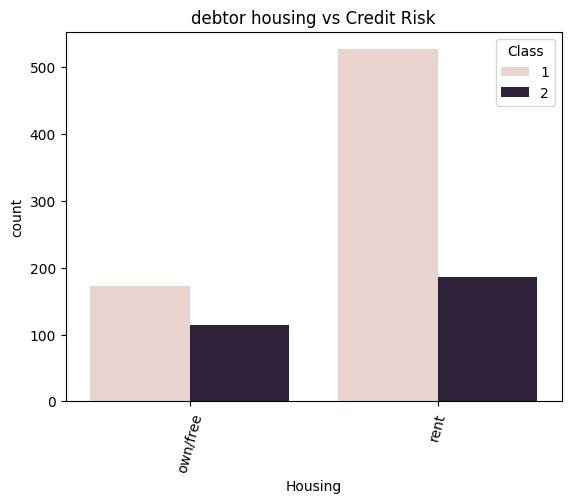

In [188]:
sns.countplot(data=X, x='Housing', hue='Class', order=sorted(X['Housing'].unique()))
plt.xticks(rotation=75)
plt.title("debtor housing vs Credit Risk")


Text(0.5, 1.0, 'Marital Status vs Credit Risk')

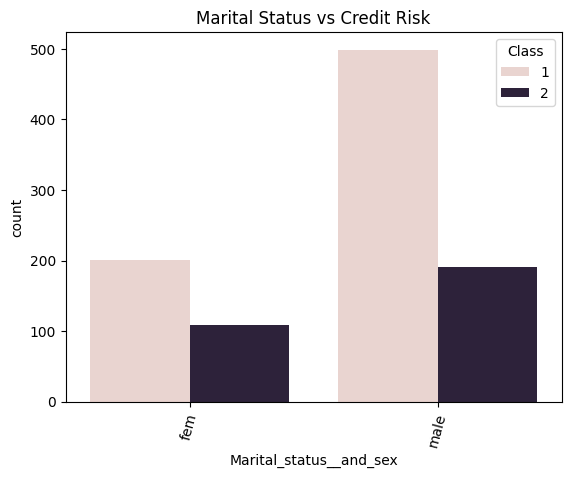

In [189]:
sns.countplot(data=X, x='Marital_status__and_sex', hue='Class', order=sorted(X['Marital_status__and_sex'].unique()))
plt.xticks(rotation=75)
plt.title("Marital Status vs Credit Risk")

Text(0.5, 1.0, 'Phone ownership vs Credit Risk')

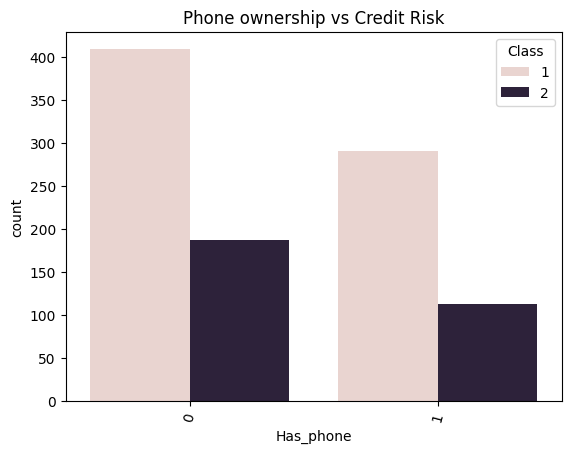

In [190]:
sns.countplot(data=X, x='Has_phone', hue='Class', order=sorted(X['Has_phone'].unique()))
plt.xticks(rotation=75)
plt.title("Phone ownership vs Credit Risk")

# insights from graphs above

1. Over a third of loans are taken out for a car loan, a quarter for new cars
2. 31% of car debtors tend to have bad credit, up to 38% when only accounting for new car debts.
3. bad car debtors tend to borrow higher amount, with the highest outliers out of the two.
4. new car debtors, regardless of loan duration, tend to have a higher bad credit proportion across the board.
5. Housing, Marital Status, Age, and even phone ownership seem to have a good correlation on credit risk.

In [191]:
X.to_csv('updated_dataset.csv')